In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import sys
sys.path.insert(1, '..')
from main_code.utils.config.config import Config
import json

In [3]:
def load_result_data(test_set, result_folder):
    # data path
    base_path = '../logs/test'
    result_path = f'{base_path}/{test_set}/{result_folder}'
    result_file = f'{result_path}/result.json'
    config_file = f'{result_path}/config.yml'
    # load result data
    with open(result_file, 'r') as f:
        result = json.load(f)
    config = Config(config_yaml=config_file, restrictive=False)
    return result, config

In [6]:
def scatter_plot(x_steps, avg_approx_errors, title, xlabel, labels=None, save_path=None, ylabel='Relative error to optimal [%]'):
    # plot stuff
    mpl.style.use('seaborn-paper')
    fig, axs = plt.subplots(1, 1, figsize=(5.66,3.5), sharex=False, sharey=False)
    # check how mayn value to plot
    if len(avg_approx_errors) == len(x_steps):
        avg_approx_errors = [avg_approx_errors]

    for k, errors in enumerate(avg_approx_errors):
        if labels:
            label = labels[k]
        else: 
            label = None
        axs.scatter(x_steps, errors, s=30, label=label)

    axs.set_ylabel(ylabel)
    axs.set_xlabel(xlabel)
    axs.set_title(title)
    axs.set_xticks(x_steps)
    # axs.set_ylim([0, 0.02])
    axs.legend()
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=400)

In [5]:
def style_plot(ax):
    pass

In [7]:
def barplot(values, labels=None, xticklabels=None, xlabel='Inference Strategy', ylabel='Relative error to optimal [%]', title=None, 
            save_path=None, log_plot=False):
    mpl.style.use('seaborn-paper')
    fig, axs = plt.subplots(1, 1, figsize=(5.66,3.5), sharex=False, sharey=False)
    values = np.array(values)
    positions = np.arange(values.shape[0]) + 1
    if labels:
        for k, value in enumerate(values):
            axs.bar(x=positions[k], height=value, label=labels[k])
    else:
        for k, value in enumerate(values):
            axs.bar(x=positions[k], height=value)
    axs.set_xticks(positions)
    if xticklabels:
        axs.set_xticklabels(xticklabels)
    if xlabel:
        axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    if title:
        axs.set_title(title)
    if log_plot:
        axs.set_yscale('log')
    axs.legend()
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=400)
    plt.show()

In [4]:
def boxplot():
    mpl.style.use('seaborn-paper')

# MCTS

In [19]:
test_set = 'uniform_n_20_128'
result_folders = ['2022-01-18_19:05:23__n_20_128_traj_100_ssteps_8_pomo_aug',
                #   '2022-01-18_17:12:57__n_20_128_traj_100_ssteps_8_pomo_aug_mcts',
                #   '2022-01-18_17:16:44__n_20_128_traj_100_ssteps_8_pomo_aug_mcts',
                #   '2022-01-18_17:23:53__n_20_128_traj_100_ssteps_8_pomo_aug_mcts',
                  '2022-01-25_14:45:22__n_20_128_traj_100_ssteps_8_pomo_aug_mcts',
                  '2022-01-25_14:48:51__n_20_128_traj_100_ssteps_8_pomo_aug_mcts',
                  '2022-01-25_14:55:40__n_20_128_traj_100_ssteps_8_pomo_aug_mcts',
                  '2022-01-25_15:06:05__n_20_128_traj_100_ssteps_8_pomo_aug_mcts']
result_data = [load_result_data(test_set, result_folder) for result_folder in result_folders]
avg_approx_errors = [result['avg_approx_error'] for result, config in result_data]
approx_errors = [np.clip(np.array(result['approx_errors']), a_min=0.0, a_max=None) for result, config in result_data]
tours = [result['tours'] for result, config in result_data]
num_playouts = [config.test['num_playouts'] for result, config in result_data]

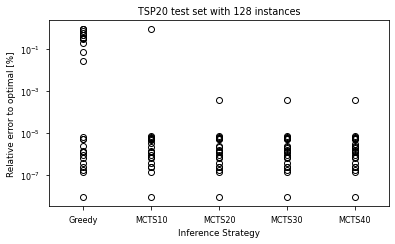

In [22]:
mpl.style.use('seaborn-paper')
fig, axs = plt.subplots(1, 1, figsize=(5.6,3.5), sharex=False, sharey=False)

positions = np.arange(len(avg_approx_errors)) + 1
axs.boxplot(approx_errors, positions=positions)
# axs.bar(x=positions, height=avg_approx_errors)
axs.set_xticklabels(['Greedy', 'MCTS10', 'MCTS20', 'MCTS30', 'MCTS40'])
axs.set_xlabel('Inference Strategy')
axs.set_ylabel('Relative error to optimal [%]')
axs.set_yscale('log')
# axs.legend()
axs.set_title('TSP20 test set with 128 instances')
plt.tight_layout()
plt.savefig('../results/plots/tsp20_mcts_boxplot.png', dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 5.23096742e-02  7.33706806e-03 -1.09128755e-06 -1.09165610e-06
 -1.03748230e-06]


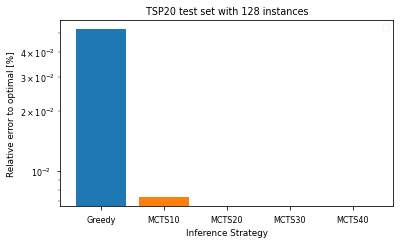

In [41]:
barplot(values=avg_approx_errors, xticklabels=['Greedy', 'MCTS10', 'MCTS20', 'MCTS30', 'MCTS40'], 
        title='TSP20 test set with 128 instances', save_path='../results/plots/tsp20_mcts_barplot.png', log_plot=True)


In [12]:
test_set = 'uniform_n_100_128'
result_folders = [#'2022-01-18_19:05:23__n_20_128_traj_100_ssteps_8_pomo_aug',
                  '2022-01-25_13:17:49__n_100_128_traj_100_ssteps_8_pomo_aug_mcts',
                  '2022-01-25_18:39:51__n_100_128_traj_100_ssteps_8_pomo_aug_mcts']
result_data = [load_result_data(test_set, result_folder) for result_folder in result_folders]
avg_approx_errors = [result['avg_approx_error'] for result, config in result_data]
approx_errors = [np.clip(np.array(result['approx_errors']), a_min=0.0, a_max=None) for result, config in result_data]
tours = [result['tours'] for result, config in result_data]
num_playouts = [config.test['num_playouts'] for result, config in result_data]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


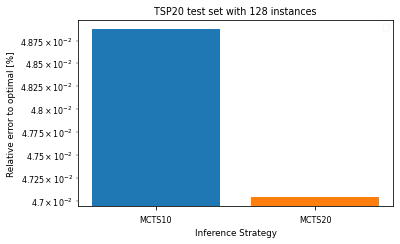

In [13]:
barplot(values=avg_approx_errors, xticklabels=['MCTS10', 'MCTS20'], 
        title='TSP20 test set with 128 instances', save_path='../results/plots/tsp100_mcts_barplot:new.png', log_plot=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


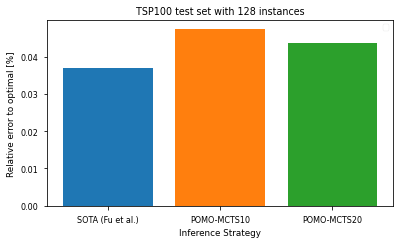

In [14]:
values = [0.0370, 0.0474, 0.0438]
xticklabels = ['SOTA (Fu et al.)', 'POMO-MCTS10', 'POMO-MCTS20']
barplot(values=values, xticklabels=xticklabels, title='TSP100 test set with 128 instances', 
        save_path='../results/plots/tsp100_mcts_barplot.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.037  0.1363 0.0474 0.0438]


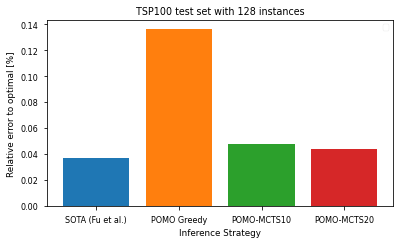

In [42]:
values = [0.0370, 0.1363, 0.0474, 0.0438]
xticklabels = ['SOTA (Fu et al.)', 'POMO Greedy', 'POMO-MCTS10', 'POMO-MCTS20']
barplot(values=values, xticklabels=xticklabels, title='TSP100 test set with 128 instances', 
        save_path='../results/plots/tsp100_mcts_barplot.png')

# MCTS - cpuct variations

In [43]:
test_set = 'uniform_n_20_128'
result_folders = ['cpuct_test/2022-01-22_00:56:20__n_20_128_traj_1_ssteps_1_mcts',
                  'cpuct_test/2022-01-22_00:58:27__n_20_128_traj_1_ssteps_1_mcts',
                  'cpuct_test/2022-01-22_01:01:43__n_20_128_traj_1_ssteps_1_mcts',
                  'cpuct_test/2022-01-22_01:05:46__n_20_128_traj_1_ssteps_1_mcts',
                  'cpuct_test/2022-01-22_01:10:05__n_20_128_traj_1_ssteps_1_mcts',
                  'cpuct_test/2022-01-22_01:14:36__n_20_128_traj_1_ssteps_1_mcts',
                  'cpuct_test/2022-01-22_01:19:11__n_20_128_traj_1_ssteps_1_mcts',]
result_data = [load_result_data(test_set, result_folder) for result_folder in result_folders]

In [44]:
avg_approx_errors = [result['avg_approx_error'] for result, config in result_data]
approx_errors = [np.clip(np.array(result['approx_errors']), a_min=0.0, a_max=None) for result, config in result_data]
tours = [result['tours'] for result, config in result_data]
cpuct_values = [config.test['c_puct'] for result, config in result_data]

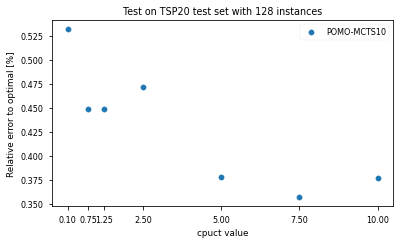

In [45]:
scatter_plot(cpuct_values, avg_approx_errors, title='Test on TSP20 test set with 128 instances', xlabel='cpuct value', 
             ylabel='Relative error to optimal [%]', labels=['POMO-MCTS10'], save_path='../results/plots/MCTS_cpuct_test.png')

# Different number of sampling steps

In [33]:
test_set = 'uniform_n_100_10000'
result_folders = ['2022-01-04_23:47:43__n_100_10000_traj_100_ssteps_16',
                  '2022-01-04_23:51:00__n_100_10000_traj_100_ssteps_32',
                  '2022-01-04_23:57:31__n_100_10000_traj_100_ssteps_64']
result_data = [load_result_data(test_set, result_folder) for result_folder in result_folders]

In [37]:

avg_approx_errors = [result['avg_approx_error'] for result, config in result_data]
approx_errors = [np.array(result['approx_errors']) for result, config in result_data]
tours = [result['tours'] for result, config in result_data]
sampling_steps = [config.test['sampling_steps'] for result, config in result_data]

In [ ]:
scatter_plot(sampling_steps, [avg_approx_errors])

# Different number of nodes

In [20]:
# get the data
pred_lengths = [3.827198, 5.69195, 7.77015, 10.85755, 13.7307, 16.745489, 19.669]
opt_lengths = [3.8303, 5.6906, 7.7609, 10.7191, 12.95, 14.89, 16.5458]
approx_to_optimal = (np.array(pred_lengths) / np.array(opt_lengths) - 1) * 100
fuetal_approx = [0.00004, 0.0145, 0.0370, 0.8844, np.nan, np.nan, 2.5365]
num_nodes = [20, 50, 100, 200, 300, 400, 500]

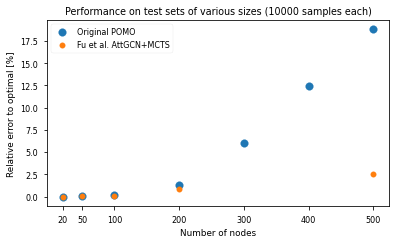

In [27]:
# plot stuff
mpl.style.use('seaborn-paper')
fig, axs = plt.subplots(1, 1, figsize=(5.6,3.5), sharex=False, sharey=False)

axs.scatter(num_nodes, approx_to_optimal, s=60, label='Original POMO')
axs.scatter(num_nodes, fuetal_approx, label='Fu et al. AttGCN+MCTS')

axs.set_ylabel('Relative error to optimal [%]')
axs.set_xlabel('Number of nodes')
axs.set_title('Performance on test sets of various sizes (10000 samples each)')
axs.set_xticks(num_nodes)
# axs.set_ylim([0, 0.02])
axs.legend()
plt.tight_layout()
plt.savefig('../results/plots/POMO_generalization.png', dpi=400)